# 080.K-Means Clustering

### Random 하게 생성된 toy dataset 으로 K-Means clustering test

make_blobs : 
```
    Input :
         n_samples :  cluster 에 균등 분할될 total data point 숫자  
         centers : generate 할 centroid 숫자  
         cluster_std : cluster 의 standard deviation    

    Output : 
        X: 생성된 sample 들  
        y: 각 sample 의 label
```
KMeans :  주요 parameters
> init : initialization method -> k-means++ (smart choosing of centroids - centroids 들이 서로 멀리 떨어지도록 초기화)  
> n_clusters : k 값  
> n_init : 반복횟수  

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [3]:
np.random.seed(0)

In [4]:
centroidLocation = [[3,2], [1,-1],[-1,2]]

X, _ = make_blobs(n_samples=1500, centers=centroidLocation)

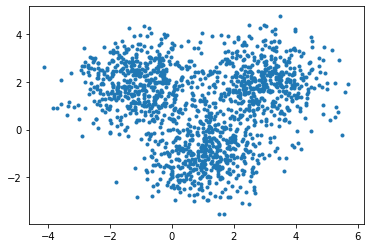

In [5]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [6]:
print(X.shape)
print(X[:10])

(1500, 2)
[[ 2.71230522 -1.79211502]
 [-0.17387429  1.94224344]
 [ 1.4595849  -0.71994214]
 [ 3.47043314  2.31144707]
 [ 3.44819528  3.69618157]
 [ 3.61407937  2.92220667]
 [-1.14763741  3.13181196]
 [ 3.06651722  2.3024719 ]
 [ 4.8831507   0.65224094]
 [-0.5033848   3.01213319]]


In [7]:
nclusters = 3

In [8]:
k_means = KMeans(n_clusters=nclusters)

In [9]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
k_means.labels_

array([2, 1, 2, ..., 0, 2, 0])

In [11]:
centers = k_means.cluster_centers_
centers

array([[ 2.94332137,  2.03105234],
       [-1.07551635,  1.95077137],
       [ 1.09377948, -1.06187746]])

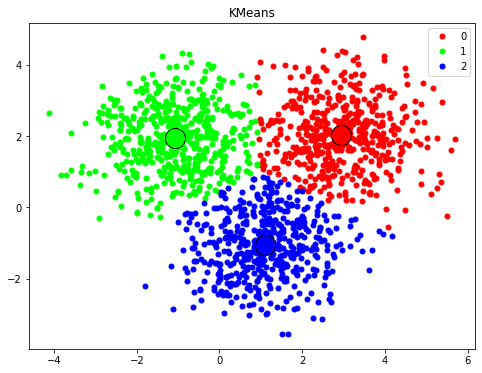

In [12]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8,6))

colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for i in range(nclusters):
    members = k_means.labels_ == i
    plt.plot(X[members, 0], X[members, 1], '.', color=colors(i), markersize=10, label=i)
    plt.plot(centers[i, 0], centers[i, 1], 'o', color=colors(i), markeredgecolor='k', markersize=20)

plt.title("KMeans")
plt.legend()